随机森林的原理大概就是，建立一大堆树，各自判断后，进行投票表决，来决定集成评估器的结果。对任何一个样本而言,平均或多数表决原则下,当且仅当有半数以上的树判断错误的时候，整个森林才会判断错误。

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import numpy as np  
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
X = wine.data
y = wine.target

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [6]:
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

d_score = dtc.score(X_test,y_test)
r_score = rfc.score(X_test,y_test)

print('single tree ,d_score:',d_score)
print('random forest ,r_score:',r_score)

single tree ,d_score: 0.8888888888888888
random forest ,r_score: 0.9629629629629629


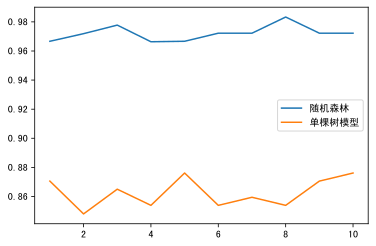

In [7]:
# 为做对比，交叉验证画出折线图
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc_list = []
dtc_list = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_score = cross_val_score(rfc,X,y,cv=10).mean()
    rfc_list.append(rfc_score)
    
    dtc = DecisionTreeClassifier()
    dtc_score = cross_val_score(dtc,X,y,cv=10).mean()
    dtc_list.append(dtc_score)

plt.plot(range(1,11),rfc_list,label='随机森林')
plt.plot(range(1,11),dtc_list,label='单棵树模型')
# plt.legend(loc='lower right')   ### defult
plt.legend()
plt.show()

0.9888888888888889 11


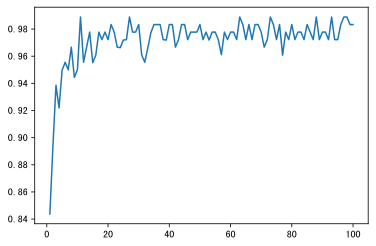

In [8]:
# 学习曲线绘制
superpa = []
for i in range(100):
    #树的数量逐渐增加
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1) 
    rfc_s = cross_val_score(rfc,X,y,cv=10).mean()
    superpa.append(rfc_s)
    
#打印出：最高精确度取值，max(superpa))+1指的是森林数目的数量n_estimators
print(max(superpa),superpa.index(max(superpa))+1)

plt.plot(range(1,101),superpa)
plt.show()

- 25棵树都判断不对的可能性(假设建立25)

![jupyter](1.png)

In [9]:
import numpy as np
from scipy.special import comb

# 假设单棵树错误率0.2
np.array([comb(25,i)*(0.2**i)*(0.8**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [10]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(X_train, y_train)

#随机森林的重要属性之一:estimators,查看森林中树的状况
rfc.estimators_[0].random_state

for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [11]:
#无需划分训练集和测试集
 
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)#默认为False
rfc = rfc.fit(wine.data,wine.target)
 
#重要属性oob_score_
rfc.oob_score_#0.9719101123595506


0.9831460674157303

In [12]:
# 尝试属性和接口
 
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(X_train, y_train)

# 测试集准确率
print('测试集准确率:')
print(rfc.score(X_test,y_test))

#结合zip可以对照特征名字查看特征重要性
print('查看特征重要性:')
print(rfc.feature_importances_)

#apply返回每个测试样本所在的叶子节点的索引
print('每个测试样本所在的叶子节点的索引:')
print(rfc.apply(X_test))

#predict返回每个测试样本的分类/回归结果
print('回归结果:')
print(rfc.predict(X_test))
print('结果预测的可能性')
print(rfc.predict_proba(X_test))

测试集准确率:
0.9629629629629629
查看特征重要性:
[0.08645652 0.02744089 0.01188517 0.02601015 0.02718709 0.0398253
 0.13239582 0.00340014 0.01968421 0.15579022 0.1112532  0.1449075
 0.21376379]
每个测试样本所在的叶子节点的索引:
[[ 8  5  8 ...  8  4  8]
 [ 5  9  3 ... 15  8 16]
 [12 10 13 ... 22  8  3]
 ...
 [ 8  5  8 ...  7  4  8]
 [ 5  5  8 ... 21  8  8]
 [ 8  5 10 ...  8  2  8]]
回归结果:
[1 2 0 1 2 0 1 1 2 0 0 2 0 1 1 1 0 2 0 2 2 1 1 1 1 2 1 1 0 0 1 2 0 1 1 2 0
 0 1 0 0 0 1 2 1 0 0 0 1 2 2 1 1 1]
结果预测的可能性
[[0.   1.   0.  ]
 [0.   0.08 0.92]
 [0.72 0.2  0.08]
 [0.24 0.72 0.04]
 [0.08 0.2  0.72]
 [1.   0.   0.  ]
 [0.12 0.84 0.04]
 [0.   1.   0.  ]
 [0.   0.08 0.92]
 [1.   0.   0.  ]
 [0.6  0.32 0.08]
 [0.   0.   1.  ]
 [0.96 0.04 0.  ]
 [0.04 0.72 0.24]
 [0.32 0.68 0.  ]
 [0.   0.92 0.08]
 [1.   0.   0.  ]
 [0.08 0.2  0.72]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.16 0.84]
 [0.   1.   0.  ]
 [0.08 0.92 0.  ]
 [0.   1.   0.  ]
 [0.2  0.76 0.04]
 [0.12 0.16 0.72]
 [0.32 0.6  0.08]
 [0.   1.   0.  ]
 [0.92 0.08 0. 

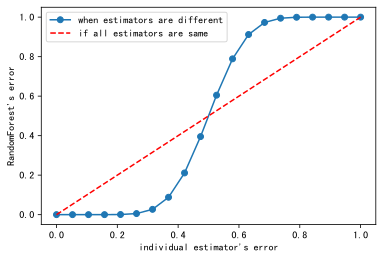

In [13]:
import numpy as np

#生成一个可能的错误率列表
x = np.linspace(0,1,20)
 
y = []
for epsilon in x:
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()      
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()


说明了单体错误率高时，整体基本也会更高。

以下为胡乱测试：可以忽略

In [42]:
中断

NameError: name '中断' is not defined

In [23]:
df = pd.DataFrame({'A':['shs','m','shs','m'],'B':[3,4,5,6]})

In [32]:
df.A.unique().tolist()

['shs', 'm']

In [41]:
labels = df["A"].unique().tolist()
labels.index('m')

1

In [34]:
df["C"] = df["A"].apply(lambda x: labels.index(x))

In [39]:
df["C"] = df["C"].apply(lambda x: x+1)

In [40]:
df

,A,B,C
0,shs,3,1
1,m,4,2
2,shs,5,1
3,m,6,2
